# CAPÍTULO 3 - CLASSIFICAÇÃO 

In [21]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier

import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator

import warnings
warnings.filterwarnings("ignore") 

## 3.1 Carregamento e analise dos dados

Para estudar o método de classificação, vamos usar o conjunto de dados 'mnist_784', tal conjunto é composto de numeros escritos por estudantes. é interresante notar que tal conjunto de dados pode ser carregado pela função 'fetch_openml' do método sklearn.datasets.


In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### O conjunto de dados carregado, tem a seguinte estrutura:

'data' contem um array com uma linha por instancia e uma coluna por caracteristica.(Cada array representa um NUMERO)

'target' contém um array com os rótulos

'DESCR' descreve os dados.

Aqui vamos usar apenas 'data' e 'target'.

In [3]:
X, y = mnist['data'], mnist['target']


In [4]:
np.array(X.loc[0])


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Aqui iremos fazer um pequeno trecho de codigo usando 'matplotlib.pyplot' para mostrar graficamente um array.

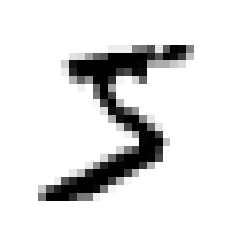

In [5]:
some_digit = np.array(X.loc[0])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image,
           cmap='binary')

plt.axis("off")
plt.show()


Os algoritimos de ML trabalham usualmente com valores numericos, por isso vamos usar a função 'astype' para converter o campo 'target'.

In [6]:
y = y.astype(np.uint8)


Precissamos dividir os dados em treinos e teste. O conjunto de dados 'mnist_784' já vem separado, os primeiros 60k são dados de treinos, enquanto os 10k ultimos de teste. Com isso. vamos separar os dados.

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


## 3.2 Classificador binario

### 3.2.1 O que é um classificador binario ?

Ao invez de trabalhar com um algoritimo que tenta prever todos os numeros, inicialmente vamos estudar uma maneira de prever apenas se o número analisado é (ou não é) um número em questão. Daí o binario, pois o algoritimo retornara apenas Verdadeiro (True) ou Falso (False).

Com isso vamos escolher o número '5'. A primeira tarefa consiste em dividir nossos 'targets' em apenas 5, para que o modelo possa 'aprender' como o '5' funciona.

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


Onde, y_train_5 e y_test_5 são serie de valores boleanos ('True' ou 'False').

### 3.2.2 O MODELO

Vamos usar um classificador e treiná-lo. Neste caso vamos usar o 'Gradiete Descendente Estocastico' SGD.

In [9]:
# Criando o modelo

from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(random_state=42)


In [10]:
# treinando o modelo

sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

Primeiramente vamos 'prever' uma instancia onde já sabemos o resultado, com o intuito de testar o modelo.

In [22]:
sgd_clf.predict([some_digit])


array([ True])

Como esperado, o retorno foi verdadeiro.

## 3.3 Cálculo de desempenho:

### 3.3.1 Validação cruzada

Divide aleatoreamente o conjunto de dados em n conjuntos (cv) e 'treina' o modelo em cada um deles de forma idependente, a fim de encontrar possiveis 'erros de continuidade' no modelo.

Aqui vamos usar o cv=3.

In [12]:
cross_val_score(sgd_clf,
                X_train,
                y_train_5,
                cv=3,
                scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Agora vamos fazer um classificador de 'não 5' e usar a validação cruzada.

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    

In [14]:
never_5_cfl = Never5Classifier()

cross_val_score(never_5_cfl,
                X_train,
                y_train_5,
                cv=3,
                scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

A acuracia alta pode enganar, mas o ponto é o seguinte, boa parte do conjunto de dados é formada por não 5 (90%), então é relativamente 'facil' a acurracia ser alta.

In [23]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,
                                 X_train,
                                 y_train_5,
                                 cv=3)

y_train_pred 

array([ True, False, False, ...,  True, False, False])

### 3.3.2 A Matriz de confusão

Uma outra forma de analisar o desempenho de um classificador é analisar sua matriz de confusão. A ideia é contabilizar todos os tipos de erros e acertos. Em outras palavras, quando o classificador indica uma imagem de maneira correta, ele pode ter classificado um '5' como '5'(verdadeiro possitivo), ou um 'não 5' como não 'não 5' (verdadeiro negativo), porém ainda existem dois tipos de classificação, analisar um '5' como 'não 5' (falso negativo) e um 'não 5' como '5' (falso positivo).

Assim vamos usar a função 'confusion_matrix' da classe 'sklearn.metrics'.


In [16]:
from sklearn.metrics import confusion_matrix

cm_5 = confusion_matrix(y_train_5, y_train_pred)
cm_5

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [17]:
print('Verdadeiros negativos: {}\n'.format(cm_5[0][0]) +
      'Falso positivos: {}\n'.format(cm_5[0][1]) +
      'Falso negativos: {}\n'.format(cm_5[1][0]) +
      'Verdadeiros positivos: {}\n'.format(cm_5[1][1]))

Verdadeiros negativos: 53892
Falso positivos: 687
Falso negativos: 1891
Verdadeiros positivos: 3530



Aqui vamos 'forçar' um resultado positivo, ou seja só valores possitivos.

In [18]:
y_train_perfect_preditions = y_train_5

In [19]:
cm_only_true = confusion_matrix(y_train_5, y_train_perfect_preditions)
cm_only_true

array([[54579,     0],
       [    0,  5421]], dtype=int64)

É interresante observar que um classificador 'perfeito' teria valores não-nulos apenas na diagonal principal.

In [20]:
print('Verdadeiros negativos: {}\n'.format(cm_only_true[0][0]) +
      'Falso positivos: {}\n'.format(cm_only_true[0][1]) +
      'Falso negativos: {}\n'.format(cm_only_true[1][0]) +
      'Verdadeiros positivos: {}\n'.format(cm_only_true[1][1]))

Verdadeiros negativos: 54579
Falso positivos: 0
Falso negativos: 0
Verdadeiros positivos: 5421

